In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"D:\Data Science by SRK\Projects\titanic(kaggle)\titanic_4\cleaned_data_removeoutlier_mean_winsorization.xlsx")
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,0,3,1,1,0,0,-0.581140,-0.894504
1,1,1,0,1,0,1,0.731849,1.691232
2,1,3,0,0,0,0,-0.252893,-0.821081
3,1,1,0,1,0,0,0.485663,1.357652
4,0,3,1,0,0,0,0.485663,-0.807959
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,-0.170831,-0.373090
887,1,1,0,0,0,0,-0.827325,0.562098
888,0,3,0,1,2,0,0.000000,0.260625
889,1,1,1,0,0,1,-0.252893,0.562098


In [2]:
# df2=pd.read_excel(r"D:\Data Science by SRK\Projects\titanic\test_data_2.xlsx")
# df2

In [3]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Train = []
CV = []

for i in range(0, 100):
    # Split the data into train and test sets for the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Initialize and train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the training set
    ypred_train = model.predict(X_train)

    # Calculate the R^2 score on the training set
    Train.append(r2_score(y_train, ypred_train))

    # Perform 5-fold cross-validation on the training set and store the mean score
    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())

# Create a DataFrame to store the Train and CV scores
em = pd.DataFrame({"Train": Train, "CV": CV})

# Find the rows where the absolute difference between Train and CV scores is <= 0.05
gm = em[abs(em['Train'] - em['CV']) <= 0.05]

# Identify the index (random state) with the highest CV score
rs = gm[gm["CV"] == gm["CV"].max()].index.tolist()[0]

print("Best random state number:", rs)


Best random state number: 43


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

# Stage-4 : Modelling and Evaluation

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1.Logistic Regression

In [97]:
#Modelling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

# Predict & Evaluate on train data
ypred_train = log_model.predict(X_train)  #default threshold value is 0.5
print("Train Accuracy: ",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score: ",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evaluation on test data
ypred_test = log_model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
predicted_outputs = ypred_test.tolist()

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8103932584269663
CV Score:  0.8089825667290457
Test Accuracy: 0.7486033519553073
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


In [10]:
len(predicted_outputs)

179

# 2.KNN

In [98]:
#Hyperparameter tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50)),"p":[1,2]}
knn_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)

#KNN with best Hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [99]:
#Modelling
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = knn_model.predict(X_train)
print("Train Accuracy: ",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score: ",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
ypred_test=knn_model.predict(X_test)
predicted_outputs = ypred_test.tolist()
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8469101123595506
CV Score:  0.825844577957254
Test Accuracy: 0.7541899441340782
Predicted Outputs: [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


# 3.Support Vector Machine(SVM)

In [100]:
#Hyperparameter tuning
from sklearn.svm import SVC
estimator=SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=1)

In [101]:
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

#Predict & Evaluate on train data
ypred_train = svm_model.predict(X_train)
print("Train Accuracy: ",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data
print("CV Score: ",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
ypred_test=svm_model.predict(X_test)
predicted_outputs = ypred_test.tolist()
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8426966292134831
CV Score:  0.8370333891460653
Test Accuracy: 0.7821229050279329
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


# 4.Decision Tree Classifier

In [102]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

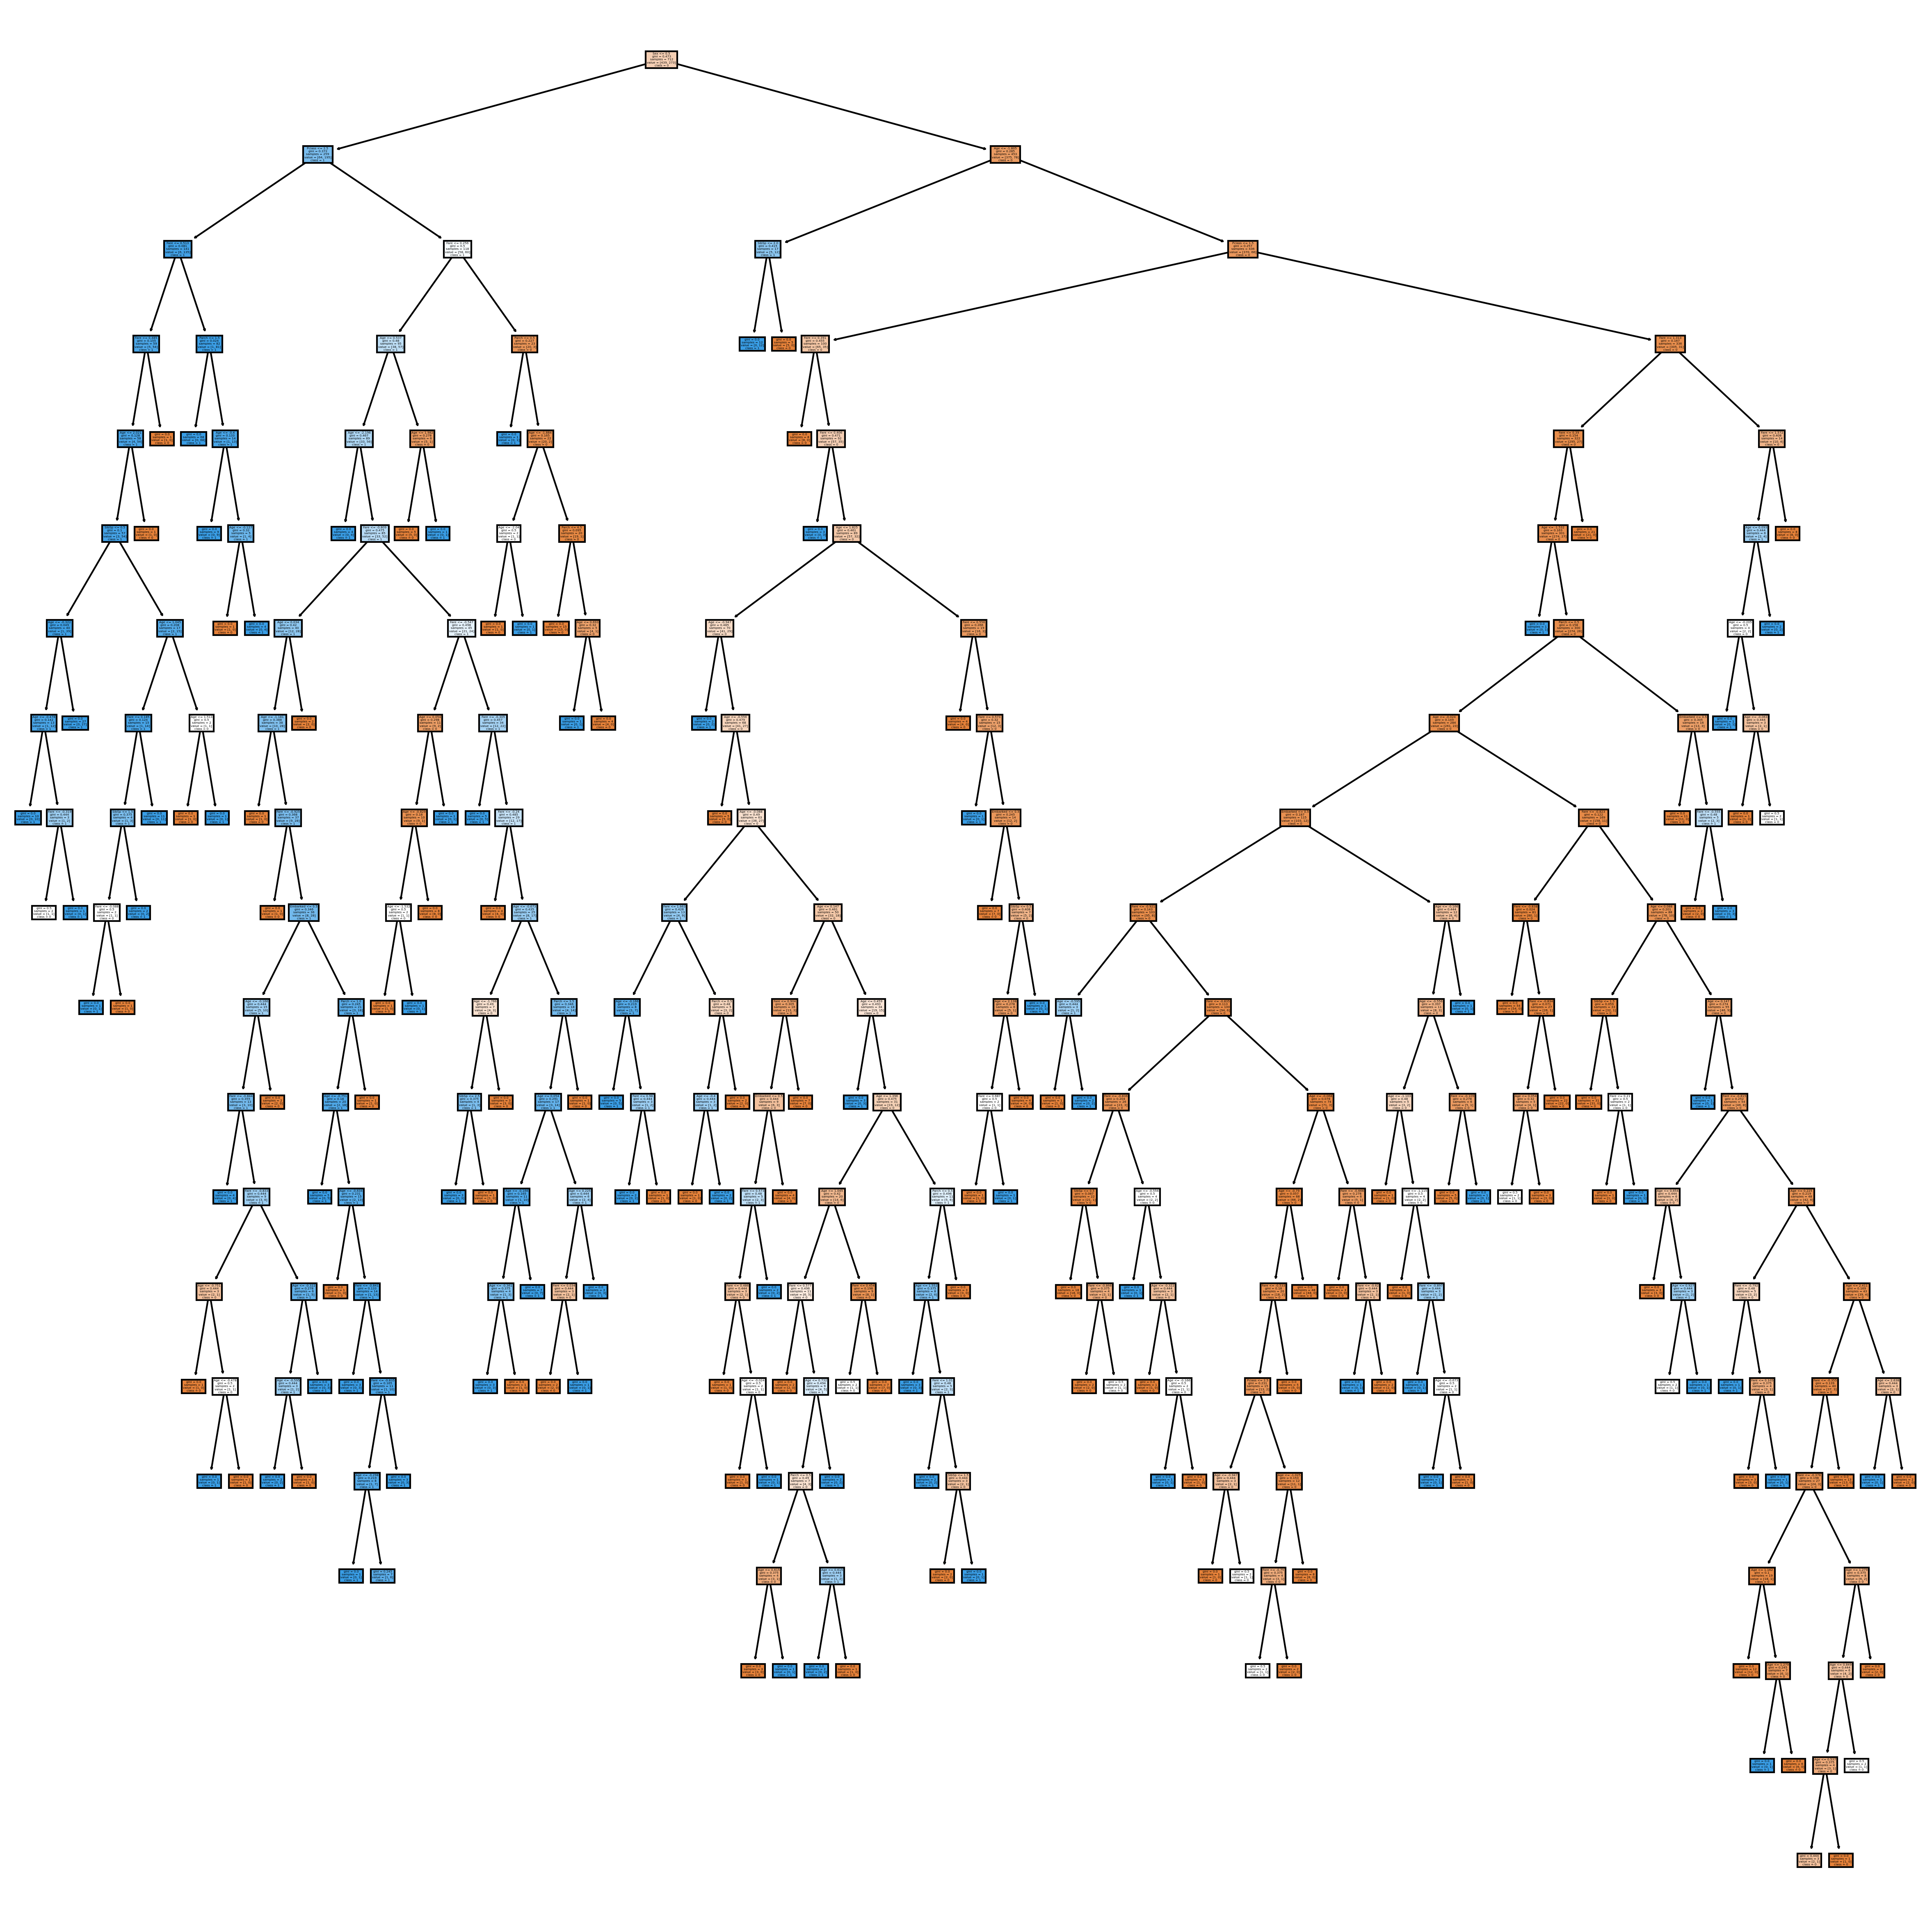

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),class_names=["0","1"])
plt.show()

In [103]:
estimator=DecisionTreeClassifier(random_state=True)
param_grid ={"criterion":["gini","entropy"],"max_depth":list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=6, random_state=True)

In [104]:
#Importat features
feats_ab = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Importance'])
important_features_dt=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [105]:
#Select train and test data
X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

#Modelling
dt=dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

#Evaluation
ypred_train=dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print("Train Accuracy: ",accuracy_score(y_train,ypred_train))
print("CV Score: ",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
#Predict & Evaluate on test data
predicted_outputs = ypred_test.tolist()

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8764044943820225
CV Score:  0.8272431793558555
Test Accuracy: 0.770949720670391
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


# 5.Random Forest Classifier


In [106]:
# Random Forest Classifier
estimator=RandomForestClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}
rf_grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=5, random_state=True)

In [107]:
#Important features
feats_ab = pd.DataFrame(data=rf.feature_importances_,index=X.columns,columns=['Importance'])
important_features_rf=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [108]:
#Select train and test data
X_train_rf=X_train[important_features_rf]
X_test_rf=X_test[important_features_rf]

#Modelling
rf=rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation
ypred_train=rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train Accuracy: ",accuracy_score(y_train,ypred_train))
print("CV Score: ",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data
predicted_outputs = ypred_test.tolist()
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.9691011235955056
CV Score:  0.803398010440264
Test Accuracy: 0.7932960893854749
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


# 6.AdaBoost Classifier

In [109]:
estimator = AdaBoostClassifier(random_state=True)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab= ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=8, random_state=True)

In [110]:
#Important Features
#Importat features
feats_ab = pd.DataFrame(data=ab.feature_importances_,index=X_train.columns,columns=['Importance'])
important_features_ab=feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Pclass', 'Sex', 'SibSp', 'Embarked', 'Age', 'Fare']

In [111]:
#Select train and test data
X_train_ab=X_train[important_features_ab]
X_test_ab=X_test[important_features_ab]

#Modelling
ab=ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

#Evaluation
ypred_train=ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy: ",accuracy_score(y_train,ypred_train))
print("CV Score: ",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

#Predict & Evaluate on test data
predicted_outputs = ypred_test.tolist()

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8146067415730337
CV Score:  0.8272530286614794
Test Accuracy: 0.7597765363128491
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


# *** 7.Gradient Boost Classifier

In [112]:
estimator = GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.3, n_estimators=8, random_state=True)

In [113]:
#Importat features
feats_gb = pd.DataFrame(data=gb.feature_importances_,index=X_train.columns,columns=['Importance'])
important_features_gb=feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['Pclass', 'Sex', 'SibSp', 'Embarked', 'Age', 'Fare']

In [114]:
#Select train and test data
X_train_gb=X_train[important_features_gb]
X_test_gb=X_test[important_features_gb]

#Modelling
gb=gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

#Evaluation
ypred_train=gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy: ",accuracy_score(y_train,ypred_train))
print("CV Score: ",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

#Predict & Evaluate on test data
predicted_outputs = ypred_test.tolist()

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8567415730337079
CV Score:  0.8356643356643356
Test Accuracy: 0.7877094972067039
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [80]:
df3=pd.DataFrame(predicted_outputs,columns=['Survived'])

In [81]:
df3.to_excel('submit_gb_survived.xlsx',index=False)

# 8.XGBoost Classifier

In [115]:
estimator = XGBClassifier()
param_grid = {"n_estimators":[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
#Important features
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,index=X_train.columns,columns=['Importance'])
important_features_xgb=feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

In [117]:
#Select train and test data
X_train_xgb=X_train[important_features_xgb]
X_test_xgb=X_test[important_features_xgb]

#Modelling
xgb=xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

#Evaluation
ypred_train=xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print("Train Accuracy: ",accuracy_score(y_train,ypred_train))
print("CV Score: ",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

#Predict & Evaluate on test data
predicted_outputs = ypred_test.tolist()

# Print or use predicted outputs as needed
print("Predicted Outputs:", predicted_outputs)

Train Accuracy:  0.8876404494382022
CV Score:  0.8342657342657344
Test Accuracy: 0.7932960893854749
Predicted Outputs: [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


# Save the best model

In [78]:
from joblib import dump
dump(gb,'titanic.joblib')

['titanic.joblib']